In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


## Import library size

In [3]:
###################################################
# Import library size
###################################################

### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    
    idn = str_remove(
        string = idn, 
        pattern = "_20x")
    
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_group(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib

Size,Sample,Group
<dbl>,<chr>,<chr>
371718546,Input1_20x,Input
18666630,Input1,Input
347635732,Input2_20x,Input
20167924,Input2,Input
349994051,Input3_20x,Input
23280988,Input3,Input
413508358,Input4_20x,Input
19003938,Input4,Input
341110487,Input5_20x,Input


In [4]:
### arguments
TARGET = "target_PER1"
IS_INPUT20X = TRUE
THRESHOLD = 10
#FDIRY  = "test_marginal_pool"
FDIRY  = "test_interactive_split"

### set samples and path
SAMPLES_TOT = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES_INP = c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES_INP20X = c(
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

if (IS_INPUT20X) {
    SAMPLES = SAMPLES_INP20X
    FDIRY   = paste0(FDIRY, "_input20x")
} else {
    SAMPLES = SAMPLES_INP
}
FD_OUT = file.path(FD_RES, "model_linear", FDIRY, TARGET)
dir.create(FD_OUT, recursive = TRUE, showWarnings = FALSE)

### set motifs
fdiry  = file.path(FD_RES, "annotation_fragment", SAMPLES[1], TARGET)
fname  = "*_merge.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
MOTIFS = basename(fpaths)

### set column names and types
CTYPES = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
CNAMES = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")

### START message
cat("Target:          ", TARGET, "\n")
cat("Output Directory:", FD_OUT, "\n")
cat("Threshold:       ", THRESHOLD, "\n")

Target:           target_PER1 
Output Directory: /home/mount/work/out/proj_combeffect/model_linear/test_interactive_split_input20x/target_PER1 
Threshold:        10 


In [17]:
mtf1 = "AP1_1_merge.bed.gz"
mtf2 = "NR_20_merge.bed.gz"
mtfs = c("AP1_1", "NR_20")
motif_pair = c(mtf1, mtf2)

In [8]:
TARGET

[1] "target_PER1"

In [ ]:
###
lst_dat = lapply(motif_pair, function(fname){
    lst = lapply(SAMPLES, function(sam){

        ### set path
        fdiry  = file.path(FD_RES, "annotation_fragment")
        fpath = file.path(fdiry, sam, TARGET, fname)    

        ### import data
        dat = read_tsv(fpath, col_types=CTYPES, col_names=CNAMES)
        if (nrow(dat) == 0){
            return(NULL)
        } else {
            dat = dat %>% 
                mutate(Sample = sam) %>%
                mutate(Length_MTF = End_MTF - Start_MTF) %>%
                mutate(Length_Dif = Length_MTF - Overlap)
            return(dat)
        }
    })

    ### arrange data
    dat = bind_rows(lst)
    return(dat)
})

In [18]:
lst_dat = lapply(seq_along(lst_dat), function(idx){
    mtf = mtfs[idx]
    dat = lst_dat[[idx]]
    
    ### Filter: fully cover the motif
    num1 = nrow(dat)
    dat = dat %>% dplyr::filter(Length_Dif == 0)
    num2 = nrow(dat)
    msg = paste(mtf, "Filter_overlap", num1, num2)
    cat(msg, "\n"); flush.console()
    return(dat)
})

AP1_1 Filter_overlap 16060 15845 
NR_20 Filter_overlap 18635 18359 


In [19]:
df1 = lst_dat[[1]]
df2 = lst_dat[[2]]

In [20]:
head(df1, 3)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_MTF,Start_MTF,End_MTF,Motif,Score,Overlap,Sample,Length_MTF,Length_Dif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,8148003,8148983,3,chr17,8148425,8148433,AP1/1,6.7321,8,Input1_20x,8,0
chr17,8148003,8148983,3,chr17,8148917,8148925,AP1/1,8.0514,8,Input1_20x,8,0
chr17,8148004,8148925,1,chr17,8148425,8148433,AP1/1,6.7321,8,Input1_20x,8,0


In [21]:
head(df2, 3)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_MTF,Start_MTF,End_MTF,Motif,Score,Overlap,Sample,Length_MTF,Length_Dif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,8149107,8150370,1,chr17,8150232,8150246,NR/20,8.3256,14,Input1_20x,14,0
chr17,8149107,8150372,1,chr17,8150232,8150246,NR/20,8.3256,14,Input1_20x,14,0
chr17,8149162,8150259,1,chr17,8150232,8150246,NR/20,8.3256,14,Input1_20x,14,0


In [22]:
### extract fragments
dat1 = bind_rows(df1, df2) %>% 
    dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
    distinct
dat2 = df1 %>% 
    dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif, Start_MTF, End_MTF)
dat3 = df2 %>% 
    dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif, Start_MTF, End_MTF)

### match fragments for the motif pair
dat = dat1 %>%
    full_join(dat2, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
    full_join(dat3, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
    mutate(Motif = paste(Motif.x, Motif.y, sep = "_")) %>%
    mutate(Motif = str_remove(string=Motif, pattern="_NA|NA_")) %>% 
    mutate(Group = str_remove(string = Sample, pattern = "[0-9]")) %>%
    mutate(X     = paste(Group, Motif, sep="_")) %>%
    mutate(X     = ifelse(str_detect(X, "Input"), "Input", X))

### count
#dat = dat %>% 
#    group_by(Sample, X) %>% 
#    summarise(Value = sum(Count_Frag), .groups = 'drop')

### normalize counts by library size
#dat = dat %>% left_join(dat_lib, by="Sample")
#dat = dat %>%
#    mutate(Norm_Value    = Value / Size) %>% 
#    mutate(Lognorm_Value = log10(Value) - log10(Size))

In [28]:
head(dat, 3)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Sample,Motif.x,Start_MTF.x,End_MTF.x,Motif.y,Start_MTF.y,End_MTF.y,Motif,Group,X
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr17,8148003,8148983,3,Input1_20x,AP1/1,8148425,8148433,NA,NA,NA,AP1/1,Input_20x,Input
chr17,8148003,8148983,3,Input1_20x,AP1/1,8148917,8148925,NA,NA,NA,AP1/1,Input_20x,Input
chr17,8148004,8148925,1,Input1_20x,AP1/1,8148425,8148433,NA,NA,NA,AP1/1,Input_20x,Input


In [30]:
tmp = dat %>% dplyr::filter(Motif == "AP1/1_NR/20") %>% mutate(Dist_MTF = abs(Start_MTF.x - Start_MTF.y))
head(tmp, 3)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Sample,Motif.x,Start_MTF.x,End_MTF.x,Motif.y,Start_MTF.y,End_MTF.y,Motif,Group,X,Dist_MTF
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr17,8149107,8150370,1,Input1_20x,AP1/1,8149893,8149901,NR/20,8150232,8150246,AP1/1_NR/20,Input_20x,Input,339
chr17,8149107,8150372,1,Input1_20x,AP1/1,8149893,8149901,NR/20,8150232,8150246,AP1/1_NR/20,Input_20x,Input,339
chr17,8149162,8150259,1,Input1_20x,AP1/1,8149893,8149901,NR/20,8150232,8150246,AP1/1_NR/20,Input_20x,Input,339


In [31]:
tmp = dat %>% dplyr::filter(Motif == "AP1/1_NR/20") %>% mutate(Dist_MTF = abs(Start_MTF.x - Start_MTF.y))
tmp = tmp %>% group_by(Sample, X, Dist_MTF) %>% summarise(Value = sum(Count_Frag), .groups = 'drop')
head(tmp)

Sample,X,Dist_MTF,Value
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input,229,560
Input1_20x,Input,339,383
Input1_20x,Input,457,161
Input1_20x,Input,640,279
Input1_20x,Input,758,83
Input1_20x,Input,938,59


In [32]:
dim(tmp)

[1] 74  4

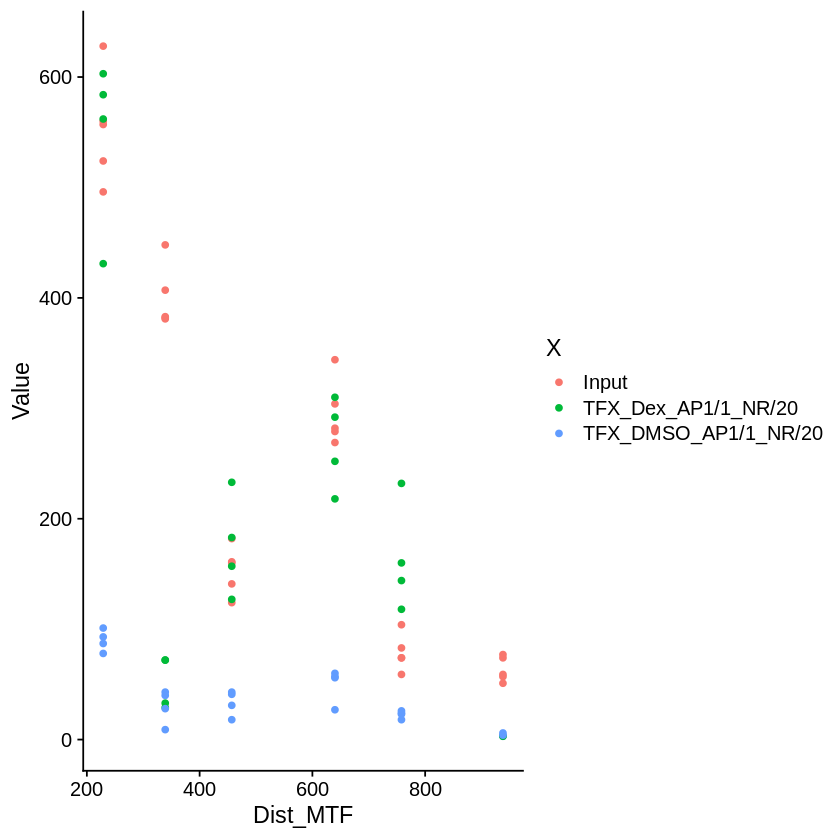

In [37]:
gpt = ggplot(tmp, aes(x=Dist_MTF, y=Value, color=X)) + geom_point() + theme_cowplot()
print(gpt)